In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment3.ipynb")

# Assignment 3 - Data Breaches

The questions in each assignment will be mostly autograded, but you will **not** see all the autograded tests in the notebook. After the deadline has passed, many additional tests will run on the file you submitted on Gradescope and you will be able to view your score online. In addition, please note that while we do NOT explicitly tell you to add chart titles and axis labels, we strongly encourage you to do so for the visualizations you create. In addition to the autograding, the TAs, will manually grade your use of chart titles and appropriate axis labels on this assignment.

## Assessment
7% of your Overall course Grade

## Due Date
February 21st (end of day 11:59pm)

## Submission instructions

<div class="alert alert-info" style="color:black">
<ul>
  <li>Download this lab from the Jupyter Book web page by clicking the download symbol at the top right of the page and selecting the <code>.ipynb</code> format.</li>
  <li>To submit this lab, answer all the questions and then upload the completed lab to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells (click the ▶▶ button).</li>
    </ul>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  </li>
</ul>
</div>

In [2]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
#alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Question 1

<div class="alert alert-info" style="color:black">

Which sectors have had the most data breaches?
To find out, complete the following tasks:

1. Run the cell that reads in the data and study the dataframe to get familiar with the column values.
2. Create a bar chart to determine which sectors have the most data breaches (i.e., this is the count of data breaches not the number of records lost)
3. Choose a suitable orientation for what goes on the x and y axes.
4. Sort the bars based on their value, with the largest bar the closest to the x-axis line.
    
</div>

_Points:_ 6

In [3]:
# Provided code to read in the data
import pandas as pd

url = 'https://raw.githubusercontent.com/kemiolamudzengi/dsci-320-datasets/main/breaches.csv'
breaches = pd.read_csv(url, parse_dates=['date'])
breaches

,index,organisation,records_lost,year,date,sector,method,data_sensitivity,source_name
0,1,Syniverse,500000000,2021,2021-09-01,telecoms,hacked,4,Vice
1,5,Thailand visitors,100000000,2021,2021-09-01,government,poor security,2,South China Morning Post
2,10,Linkedin,700000000,2021,2021-07-01,web,hacked,1,9 to 5 mac
3,21,Experian Brazil,220000000,2021,2021-02-01,finance,hacked,2,ZDNet
4,24,Facebook,533000000,2021,2021-03-01,tech,hacked,1,Business Insider
...,...,...,...,...,...,...,...,...,...
62,304,Sony PSN,77000000,2011,2011-04-01,gaming,hacked,1,Mashable
63,345,Heartland,130000000,2009,2009-01-01,finance,hacked,3,Dark Reading
64,353,US Military,76000000,2009,2009-10-01,military,lost device,2,Wired
65,379,TK / TJ Maxx,94000000,2007,2007-03-01,retail,hacked,3,ZD Net


/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


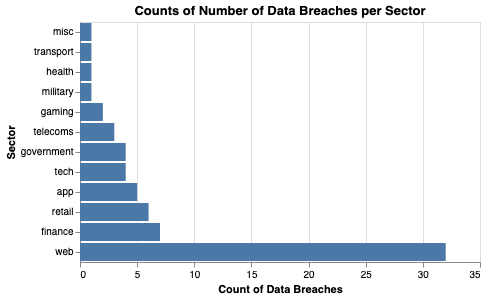

In [4]:
bar_sector_count = alt.Chart(breaches).mark_bar().encode(
    x = alt.X("count(records_lost):Q", title = "Count of Data Breaches"),
    y = alt.Y("sector:N", sort = "x", title= "Sector")
).properties(
    title = "Counts of Number of Data Breaches per Sector"
)

# Show the plot
bar_sector_count

In [5]:
grader.check("q1")

q1 results: All test cases passed!
q1 - 1 message: This test only checks that your variables have the correct name and type

### Question 2

<div class="alert alert-info" style="color:black">

Out of all the data breaches from each sector, how many are there of each data sensitivity level?
To find out, complete the following task:
    
Building off of the your answer for Q1, add information about how sensitive the data breaches in each category were,
   by creating a stacked bar chart
   where each section of the bar is encoded with color according to the data sensitivity.
   Make sure that the data sensitivity is encoded as an ordinal color variable,
   to reflect that there is an order between the five levels of sensitivity
   (1 = least sensitive, 5 = most sensitive).

</div>

_Points:_ 7

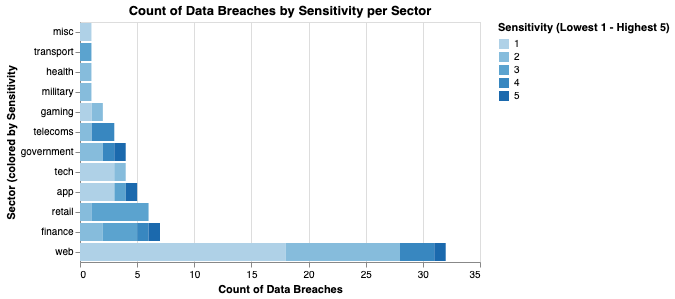

In [6]:
bar_sector_sensitivity_count = alt.Chart(breaches).mark_bar().encode(
    x = alt.X("count(records_lost):Q", title = "Count of Data Breaches"),
    y = alt.Y("sector:N", sort = "x", title = "Sector (colored by Sensitivity"),
    color = alt.Color("data_sensitivity:O", title = "Sensitivity (Lowest 1 - Highest 5)")
).properties(
    title = "Count of Data Breaches by Sensitivity per Sector"
)

# Show the plot
bar_sector_sensitivity_count

In [7]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 1 message: This test only checks that your variables have the correct name and type

### Question 3

<div class="alert alert-info" style="color:black">

It can often be difficult to compare the length of segments in a stacked bar chart,
since they do not start at the same baseline.
Another way of visualizing the information in the previous plot,
is to create a scatterplot with counts of the combinations of each sector and data sensitivity category:

1. Create a scatterplot
   with the sectors on the y-axis
   and the data sensitivity level on the x-axis
   (encoded as an ordinal variable).
2. Encode the counts of each combination as the size of the points.
3. Sort the y-axis based on the counts (the size encoding).
4. Add a tooltip with the exact count of each categorical combination.

</div>

_Points:_ 8

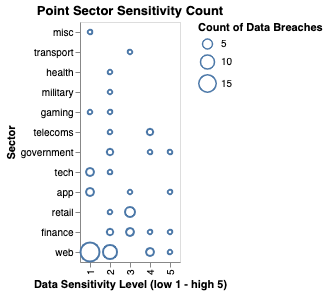

In [8]:
point_sector_sensitivity_count = alt.Chart(breaches).mark_point().encode(
    x = alt.X("data_sensitivity:O", title = "Data Sensitivity Level (low 1 - high 5)"),
    y = alt.Y("sector", sort = "size", title = "Sector"),
    size = alt.Size("count()", title = "Count of Data Breaches"),
    tooltip = alt.Tooltip(["count()"])
).properties(
    title = "Point Sector Sensitivity Count"
).interactive()

# Show the plot
point_sector_sensitivity_count

In [9]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 1 message: This test only checks that your variables have the correct name and type

### Question 4

<div class="alert alert-info" style="color:black">

Another way of visualizing the information in the previous plot is to create a heatmap with counts of the combinations of each sector and data sensitivity category:

1. Create a heatmap
   with the sectors on the y-axis
   and the data sensitivity level on the x-axis
   (encoded as an ordinal variable).
2. Encode the counts of each combination as the color of the rectangle
3. Sort the y-axis based on the counts.
4. Add a tooltip with has the sector, data sensitity and count

</div>

_Points:_ 14

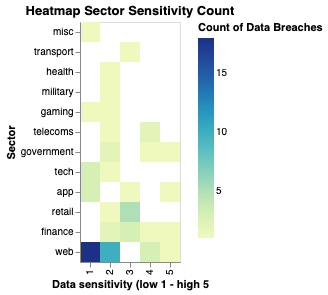

In [10]:
heatmap_sector_sensitivity_count = alt.Chart(breaches).mark_rect().encode(
    x = alt.X("data_sensitivity:O", title = "Data sensitivity (low 1 - high 5"),
    y = alt.Y("sector", sort = "color", title = "Sector"),
    color = alt.Color("count()", title = "Count of Data Breaches"),
    tooltip = ["sector", "data_sensitivity", "count()"],
).properties(
    title = "Heatmap Sector Sensitivity Count"
).interactive()

# Show the plot
heatmap_sector_sensitivity_count

In [11]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: All your variables have the expected name and type

<!-- BEGIN QUESTION -->

### Question 5

<div class="alert alert-info" style="color:black">

Compare the last three visualizations that you created. Which is most effective at answering the questions below.
Answer the questions and use the theoretical concepts you have been exposed (in the course) to explain why that visualization is more effective than the others

1. Which sector has the highest number of breaches in our dataset?
2. What proportion of leaked government data is most sensitive (i.e. level 5 sensitivity)?
</div>

_Points:_ 0

The most effective visualization to answer above questions could be the stacked bar chart of `Q2`, because by its nature of using bar charts, it clearly demonstrate differences of counts among groups, and thus it give us a popout effect to quickly denote peak bars (or only one peak when there is a max). Moreover, it has common numeric scales combined with color (less than 6, so still differentiable, this case by a hue) sub-grouping,  hence provides extra context on denoting how big role this sub group plays in the bigger grouping. In terms of other charts, the normal bar chart of `Q1` do not have extra context from the stacks, thus we might not be able to answer the proportion question; The scatter plot of `Q3` is hard to tell exact number of records breached, plus, the axis is sort of meaningless since its just a level ordering of an attribute; The heatmap of `Q4` might not be friendly to people with colorblind issue, and the empty blocks (when we dont have records for certain observations) might cause confusion, and not effectively answering proportions. Lastly, the answers to the sub-question of this `Q5` is below:

1. The `Web` sector has the highest number of breaches in our dataset ranging from data sentivititys from 1 to 5 (5 is most important)
2. The proportion of leaved governement data that's most sensitive is extremely small, 1/5 records was leaked. 

<!-- END QUESTION -->

### Question 6

<div class="alert alert-info" style="color:black">

Next, let's explore how the size of the breaches have changed over time.
To make the plot easier to interpret,
we will focus on the four sectors with the most data breaches.
The necessary data wrangling for this has already been done for you,
and you need to use the wrangled data to complete the following tasks:

1. Create a scatter plot with the date on the x-axis
   and the records lost on the y-axis.
2. Let the size of the points indicate the sensitivity of the breached data.
3. Let the color indicate which sector the point belongs to.
4. Add a tooltip that displays the source of the breach
  when the point is hovered over with the mouse pointer.

</div>

_Points:_ 10

In [12]:
# Provided data wrangling
top_sectors = breaches['sector'].value_counts().nlargest(4).index.tolist()
top_breaches = breaches.query('sector in @top_sectors')

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


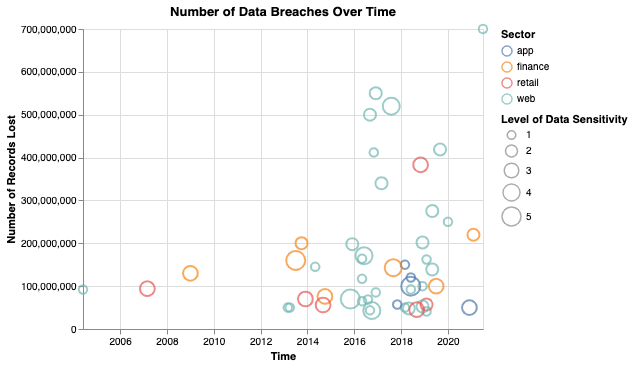

In [13]:
# consider add interactiveness?
scatter_breaches_over_time = alt.Chart(top_breaches).mark_point().encode(
    x = alt.X("date:T", title = "Time"),
    y = alt.Y("records_lost", title = "Number of Records Lost"),
    size = alt.Size("data_sensitivity", title = "Level of Data Sensitivity"),
    color = alt.Color("sector", title = "Sector"),
    tooltip = ["source_name"]
).properties(
    title = "Number of Data Breaches Over Time"
)

# Show the plot
scatter_breaches_over_time

In [14]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 1 message: This test only checks that your variables have the correct name and type

### Question 7

<div class="alert alert-info" style="color:black">

For the next 3 questions, let's return to the original dataset (i.e., breaches)
Next, let's use a sorted bar chart to determine which method resulted in the most records lost

1. Create a bar chart with the sum of records lost encoded on the x-axis and the method encoded on the y-axis
2. Sort such that the method with the highest number of records lost is furthest away from the x-axis
</div>

_Points:_ 9

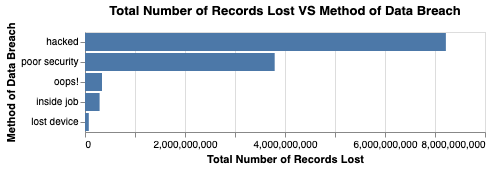

In [15]:
bar_method_records_lost = alt.Chart(breaches).mark_bar().encode(
    x = alt.X("sum(records_lost)", title = "Total Number of Records Lost"),
    y = alt.Y("method", sort = "-x", title = "Method of Data Breach")             
).properties(
    title = "Total Number of Records Lost VS Method of Data Breach"
)

# Show the plot
bar_method_records_lost

In [16]:
grader.check("q7")

q7 results: All test cases passed!
q7 - 1 message: All your variables have the expected name and type

### Question 8

<div class="alert alert-info" style="color:black">

Next, let's use a **normalized** stacked bar to get a sense of the sensitivity distribution for each method.
Create a stacked bar chart with
1. The sum of records lost encoded on the x-axis
2. The method on the y-axis
3. Sensitivity on the color channel
</div>

_Points:_ 12

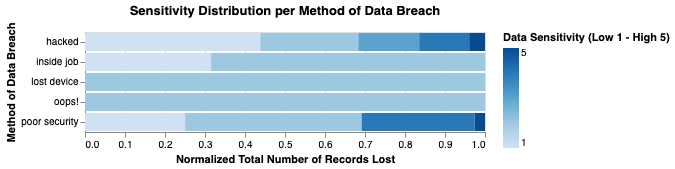

In [17]:
# This question is weird check ^^^^^
sbar_method_records_sensitivity = alt.Chart(breaches).mark_bar().encode(
    x = alt.X("sum(records_lost)", stack = "normalize", title = "Normalized Total Number of Records Lost"),
    y = alt.Y("method", title = "Method of Data Breach"),
    color = alt.Color("data_sensitivity", title = "Data Sensitivity (Low 1 - High 5)")
).properties(
    title = "Sensitivity Distribution per Method of Data Breach"
)

# Show the plot
sbar_method_records_sensitivity

In [18]:
grader.check("q8")

q8 results: All test cases passed!
q8 - 1 message: All your variables have the expected name and type

### Question 9

<div class="alert alert-info" style="color:black">

You have done alot, let's create one more visualization.
Create a scatterplot with using the dataset for the given sectors
1. sector encoded on y channel
2. method encoded on x channel
3. sum of records_lost with size
4. data sensitivity with color
</div>

_Points:_ 8

In [19]:
# Provided Wrangling
sector_list = ['app', 'finance', 'government', 'web', 'military']
selected_sectors = breaches.loc[(breaches['sector'].isin(sector_list))]


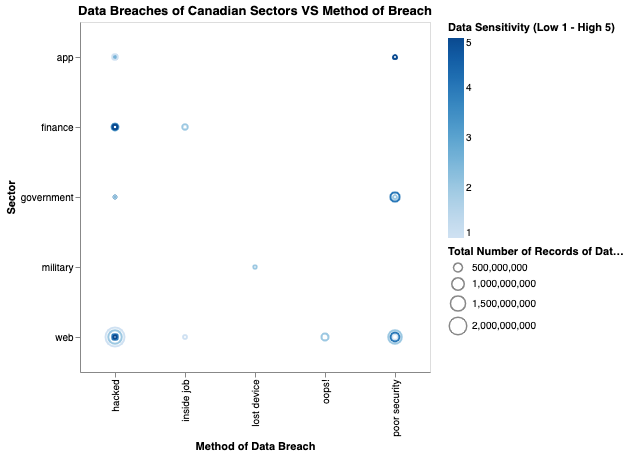

In [20]:
scatter_some_sectors = alt.Chart(selected_sectors).mark_point().encode(
    x = alt.X("method", title = "Method of Data Breach"),
    y = alt.Y("sector", title = "Sector"),
    size = alt.Size("sum(records_lost)", title = "Total Number of Records of Data Breach"),
    color = alt.Color("data_sensitivity", title = "Data Sensitivity (Low 1 - High 5)")
).properties(
    width=350, # change size, the default is too small ...
    height=350,
    title = "Data Breaches of Canadian Sectors VS Method of Breach"
)

# Show the plot
scatter_some_sectors

In [21]:
grader.check("q9")

q9 results: All test cases passed!
q9 - 1 message: All your variables have the expected name and type

<!-- BEGIN QUESTION -->

### Question 10

<div class="alert alert-info" style="color:black">

For each of the visualizations you have created (i.e., 8 in total), using the task abstraction framework presented in class, write out one task that each viz is effective at.
 In addition write out one thing your learned about data breaches from this dataset/assignment </div>

_Points:_ 0

The Visualizations are effective at (1-8 in order):
1. Comparing values among categories, in this case, counts of records of data breach by sectors
2. Analyzing sub groups of the values of categories, in this case, differentiating the sensitivity within counts of records of data by sectors
3. Separating sub groups of the value of categories, in this case, exploring the difference of sensitivity through size
4. Discovering relevance of sub groups of the value of categories, in this case, how frequent are apperance of certain records of a data sensitivity denote by color, i.e. most frequent darker color and least with lighter color.
5. Ilustrating relationships between attributes, i.e. determining if the number of records lost is dependent on time, and when is a peak time that most data breaches occured.
6. Explaining orders of values among groups, i.e. which is the method that has most number of records lost and its total.
7. Presenting the proportions of sub-groups within their group of values, i.e. what is the proportion of a level of data sensitivity of some data breached within certain sector.
8. Presenting the sector that has most data breached, color by its levels of data sensitivity


I learned that the easiest way to breach data is through web, meaning Internet is no more safe for us, whereas we should be very careful when browsing throught it, specially when we have to enter confidential or personal data, since the ranges of severity is huge from lowest (irrevelant) to highest (confidential). And, it is extremely hard to breach confidential data from government!


<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart and run all before submitting**
    
Before submitting your notebook.
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your submission on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for DSCI 320,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
</div>